## Tutorial and Homework 5 (SOLUTIONS!): Modeling Faces using PCA 

### In this tutorial, and associated homework, we will model faces using PCA, and learn how to detect a smile.  


In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 

#### In the attached file, I have 72 faces, each one 50 pixels x 50 pixels.
#### 36 faces are labeled "neutral" while 36 faces are labeled "smiling"  

In [2]:
f = loadmat('data/faces.mat')
faces = f['faces'] #This are the faces.  There are 72 faces closely cropped to the boundary of the face.
smiling = f['smiling'][0] #Flag to indicate if the face was a smile. 0 means neutral expression and 1 means smiling.

#### Visualize some of the faces

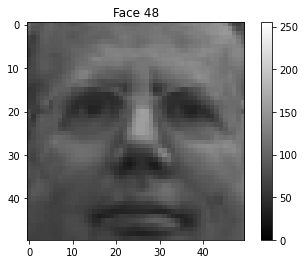

In [3]:
sample = 48
plt.figure()
plt.imshow(faces[sample,:,:],cmap='gray',vmin = 0,vmax = 255) #why did i choose 0,255 (hint: 8 bit images)
plt.title('Face ' + str(sample))
#plt.axis('off')
plt.colorbar()

#### Here's a little code box I used to get some empirical information on the the faces 

In [4]:
print('min ',np.min(faces))
print('max ',np.max(faces))


min  3.6116015158323607
max  222.22671761601015


#### Lets get the mean face 

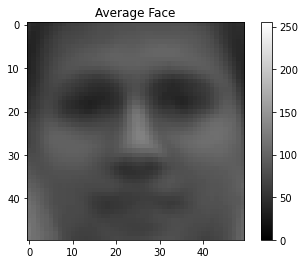

In [5]:
meanface = np.mean(faces,axis = 0)
plt.figure()
plt.imshow(meanface,cmap='gray',vmin = 0,vmax = 255) #why did i choose 0,255 (hint: 8 bit images)
plt.title('Average Face')
#plt.axis('off')
plt.colorbar()

#### Problem #1 Visualize the mean face for smiling and neutral faces.  
####            Also make an image of the difference between the two mean faces. 

Text(0.5, 1.0, 'Smiling Face - Neutral Face')

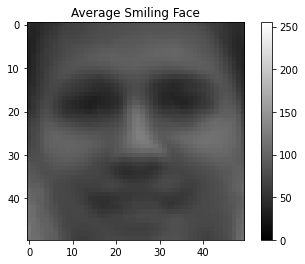

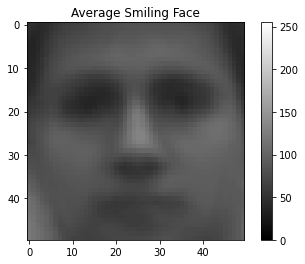

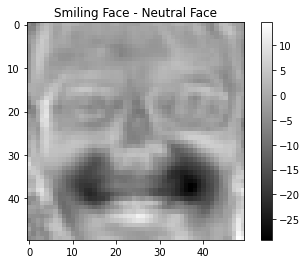

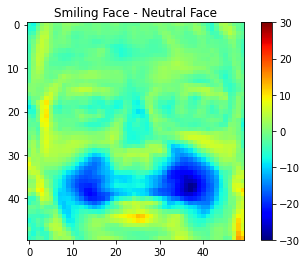

In [6]:
#make your code here
mean_smilingface = np.mean(faces[smiling == 1,:,:],axis = 0)
plt.figure()
plt.imshow(mean_smilingface,cmap='gray',vmin = 0,vmax = 255) #why did i choose 0,255 (hint: 8 bit images)
plt.title('Average Smiling Face')
#plt.axis('off')
plt.colorbar()
#make your code here
mean_neutralface = np.mean(faces[smiling == 0,:,:],axis = 0)
plt.figure()
plt.imshow(mean_neutralface,cmap='gray',vmin = 0,vmax = 255) #why did i choose 0,255 (hint: 8 bit images)
plt.title('Average Smiling Face')
#plt.axis('off')
plt.colorbar()
diff_meanface = mean_smilingface-mean_neutralface
plt.figure()
plt.imshow(diff_meanface,cmap='gray') #notice i didnt put a vmin and vmax 
#plt.axis('off')
plt.colorbar()
plt.title('Smiling Face - Neutral Face')
plt.figure()
plt.imshow(diff_meanface,cmap='jet',vmin = -30, vmax = 30) #notice i didnt put a vmin and vmax 
#plt.axis('off')
plt.colorbar()
plt.title('Smiling Face - Neutral Face')

#### If we were to do a statistical test of the difference between smiling and neutral faces, the simplest thing to do is to use an independent samples **t-test**
#### The first 36 images are neutral and the next 36 images are smiling faces.  
#### What we will do is at each image pixel we will do a t-test comparing the 36 values for a neutral face to the 36 values for smiling face 


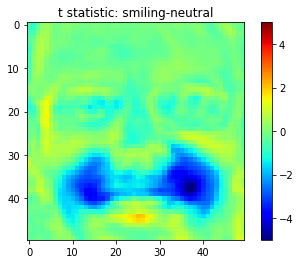

In [7]:
from scipy.stats import ttest_ind
#
t,p = ttest_ind(faces[smiling == 1,:,:],faces[smiling == 0,:,:],axis = 0)
plt.figure()
plt.imshow(t,cmap='jet',vmin = -5, vmax=5)
plt.title('t statistic: smiling-neutral')
#plt.axis('off')
plt.colorbar()

#### A t-statistic is a simple measure of the differences between two sets of observations.  Its the difference in mean divided by a pooled estimate of standard deviation, https://vitalflux.com/two-sample-t-test-formula-examples/

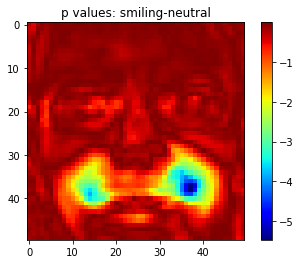

In [8]:
plt.figure()
plt.imshow(np.log10(p),cmap='jet')
plt.title('p values: smiling-neutral')
#plt.axis('off')
plt.colorbar()
plt.show()

#### Lets examine what this means.  Clearly at two locations in the mouth region there is a large difference between the two samples (smiling and neutral faces).  

#### I want to remind you of what **Significance** means in a statistical test. 

In [9]:
alpha = 0.05 #significance level 
nsig = len(p  < alpha)
print('nigs: ', nsig)
ntests = 50*50
print('ntests :', ntests)
false_rate = ntests*alpha 
print('false_rate:', false_rate)

nigs:  50
ntests : 2500
false_rate: 125.0


#### PCA analysis of faces

# FROM NOW I AM GOING TO FOLLOW SCIKIT LEARN NOMENCLATURE. 
# A COMPONENT IS AN EIGENVECTOR - WE WILL CALL IT A COMPONENT.  
# WE ALSO GET BACK EIGENVALUES WHICH SCIKIT CALLS EXPLAINED_VARIANCE 
# LOADINGS ARE THE PROJECTIONS OF THE EIGENVECTORS ON THE DATA.  YOU GET THAT BY ROTATING THE DATA ONTO THE EIGENVECTORS

In [10]:
faces2 = faces.reshape(72,50*50) # the data matrix is 72 by 2500 and there are 2500 variables and 72 observations.  
meanfaces2 = meanface.reshape(50*50)
ncomp = 70  # I am going to choose to look at 72 components. 
pca = PCA(n_components = ncomp) #decide of number of components. ALWAYS less than or equal to smaller dimension of data matrix
pca.fit(faces2) #fit the model
face_components = pca.components_ #get the eigenvectors (remember, they are rows!)
face_eigenvalues = pca.explained_variance_ #get the explained variance
face_percentage_explained  = 100*face_eigenvalues/sum(face_eigenvalues)
face_loadings = pca.transform(faces2)

#### Some notes on the dimensionality and meaning of the various quantities in the above expressions. 

* #### nobs = 72 (the number of faces)
* #### nvars = 50x50 = 2500 (the total number of pixels)
* #### ncomp = 70 (I chose this as 70 for convenience.  It must be the less than the lesser of nobs and nvars ) 

* #### faces2 has dimensions (nobs,nvars)
* #### face_components has dimensions (ncomp,nvars)
* #### face_eigenvalues has dimensions (ncomp)
* ####  face_loadings has dimensions (nobs,ncomp)

### THE IMPORTANT RELATIONSHIPS

### 1. Reducing the dimensionality of the data 

* #### faces2 = face_loadings*face_components
* #### (nobs,nvars) = (nobs,ncomp)(ncomp,nvars)

### The important thing is I dont have to actually use all the eigenvectors in face_components and face_loadings.  If i choose to keep the first nc components i can do 

* #### faces2_reconstructed = face_loadings[:,range(nc)]*face_componets[range(nc),:]
* ####    (nobs,nvars) = (nobs,nc)(nc,nvars)

#### This will produce some error but it hopefully isnt very much.

### 2.  I can work in the components space with a much smaller data matrix. 

#### face_loadings is the critical variable here. It contains the variance of of the original data which had nvars = 2500 variables in ncomp = 70 variables. 
#### Actually, I could choose to only use nc of the components even further reducing the dimensionality of the data.    



#### Examine the explained variance. 

Text(0, 0.5, 'Percentage Variance')

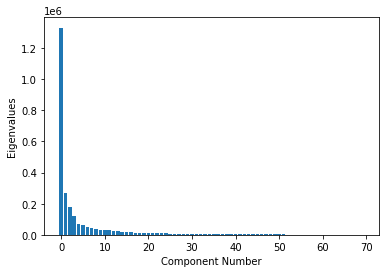

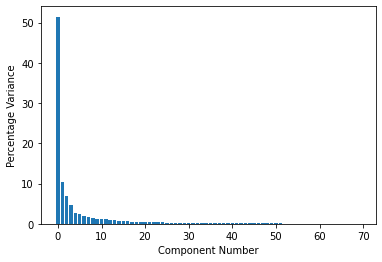

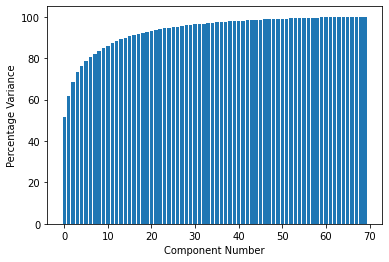

In [11]:
plt.figure()
plt.bar(np.arange(0,ncomp,1),face_eigenvalues)
plt.xlabel('Component Number')
plt.ylabel('Eigenvalues')
plt.figure()
plt.bar(np.arange(0,ncomp,1),face_percentage_explained)
plt.xlabel('Component Number')
plt.ylabel('Percentage Variance')
plt.figure()
plt.bar(np.arange(0,ncomp,1),np.cumsum(face_percentage_explained))
plt.xlabel('Component Number')
plt.ylabel('Percentage Variance')



#### Im going to use reshape to reshape the COMPONENTS (eigenvectors) into images

### Problem #2  Visualize using imshow the first 5 COMPONENT eigenvectors.  

#### To help you do this problem, I am going to reshape the loading vector back into the shape of the original image

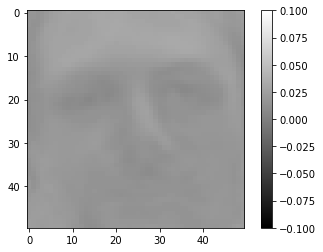

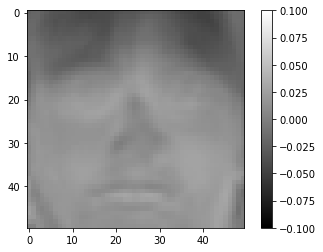

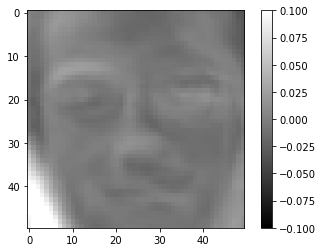

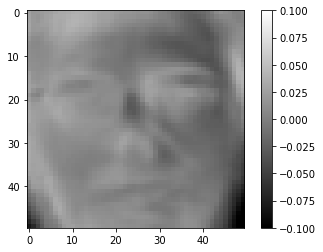

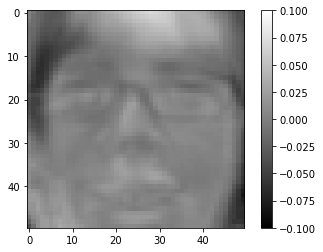

In [13]:
face_components_image = face_components.reshape(ncomp,50,50)
### write your code here to look at the first 5 loading vectors as images 
for j in range(5):
    plt.figure()
    plt.imshow(face_components_image[j,:,:],cmap='gray',vmin = -0.1, vmax = 0.1) 
    plt.title('')
    plt.colorbar()
    plt.show()

### Discuss the scale of the figure above. 

In [14]:
face_components_norm = np.sum(face_components**2,axis = 1)


#### How do these images load on the individual subjects?

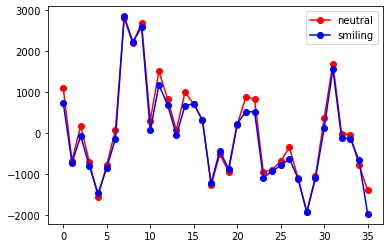

In [15]:
c = 0
plt.plot(face_loadings[smiling == 0,c],'ro-')
plt.plot(face_loadings[smiling == 1,c],'bo-')
plt.legend(('neutral','smiling'))
plt.show()


#### Problem #3 Use the independent samples t test on the face_loadings variables
#### Find which components capture the difference between neutral and smiling and visualize them

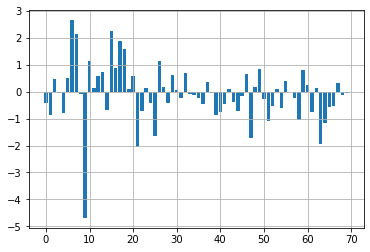

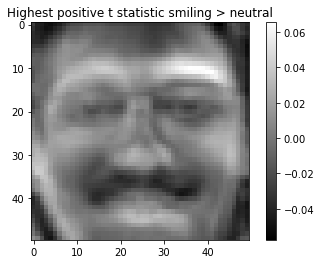

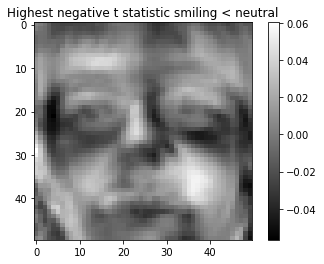

In [18]:
#Here, you run ttest_ind on the face_loadings.  A test statistic should be computer for each of the ncomp eigenvectors.  

[t_loadings,p_loadings] = ttest_ind(face_loadings[smiling == 1,:],face_loadings[smiling == 0,:],axis = 0)
plt.bar(np.arange(0,ncomp,1),t_loadings)
plt.grid()
nmax = np.argmax(t_loadings)
nmin = np.argmin(t_loadings)
plt.figure()
plt.imshow(face_components_image[nmax,:,:],cmap='gray') 
plt.title('Highest positive t statistic smiling > neutral')
plt.colorbar()
plt.show()
plt.figure()
plt.imshow(face_components_image[nmin,:,:],cmap='gray') 
plt.title('Highest negative t statistic smiling < neutral')
plt.colorbar()
plt.show()


#### Finally, out of completeness, I demonstrate that I can reconstruct the images from the eigenfaces 

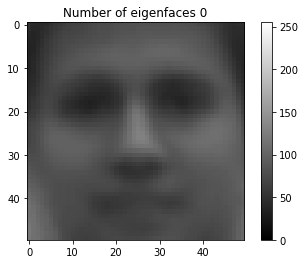

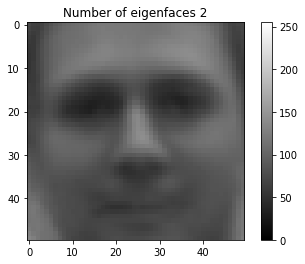

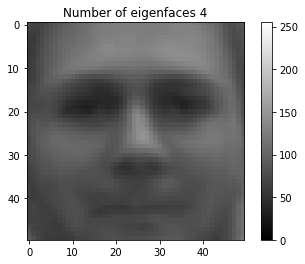

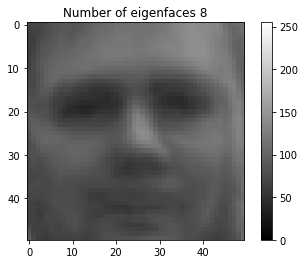

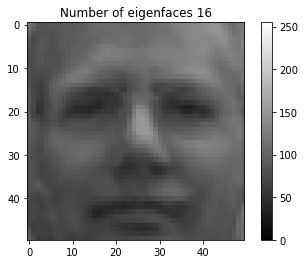

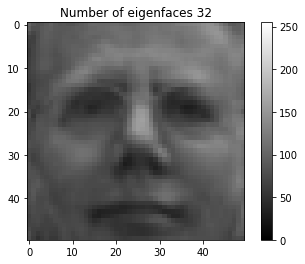

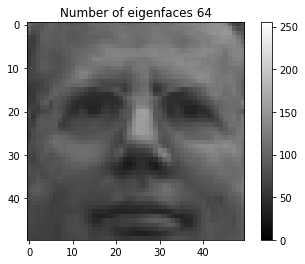

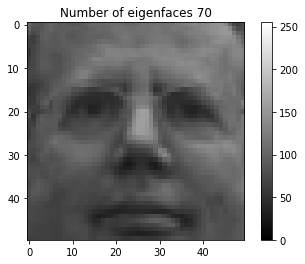

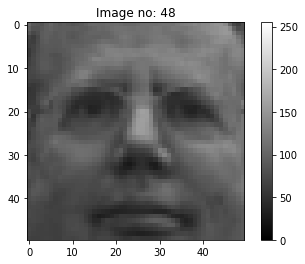

In [20]:
imageno = 48
nc = [0,2,4,8,16,32,64,70]
for j in range(len(nc)):
    compface = face_loadings[imageno,np.arange(nc[j])]@face_components[np.arange(nc[j]),:]
    makeface = compface.reshape(50,50) +meanface
    plt.figure()
    plt.imshow(makeface,cmap='gray',vmin = 0,vmax = 255)
    plt.title('Number of eigenfaces ' + str(nc[j]))
    plt.colorbar()

f1 = faces[imageno,:,:]
plt.figure()
plt.imshow(f1,cmap='gray',vmin = 0,vmax = 255)
plt.title('Image no: ' + str(imageno))
plt.colorbar() 
plt.show()

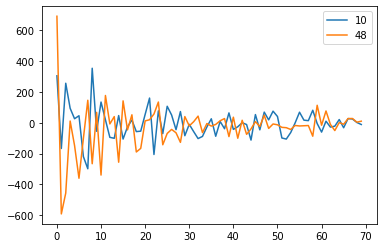

In [23]:
plt.plot(face_loadings[10,:])
plt.plot(face_loadings[48,:])
plt.legend(('10','48'))